In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv('/content/titanic_dataset.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


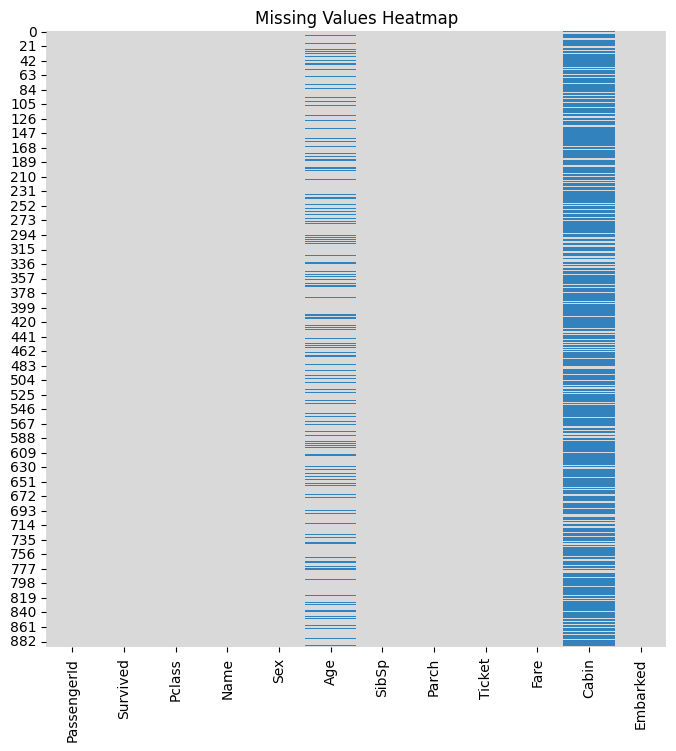

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(),cbar=False, cmap='tab20c_r')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
df=df.drop(['Cabin'],axis=1)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


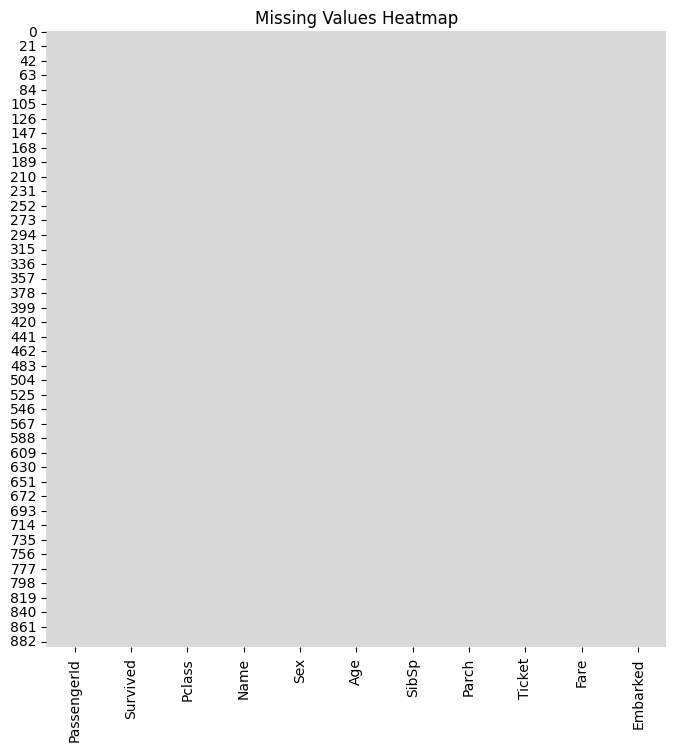

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(),cbar=False, cmap='tab20c_r')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch']

In [ ]:
df['FamilySize']

,FamilySize
0,1
1,1
2,0
3,1
4,0
...,...
886,0
887,0
888,3
889,0


In [ ]:
df = df.drop(columns=['PassengerId','Name','Ticket'],axis=1)


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


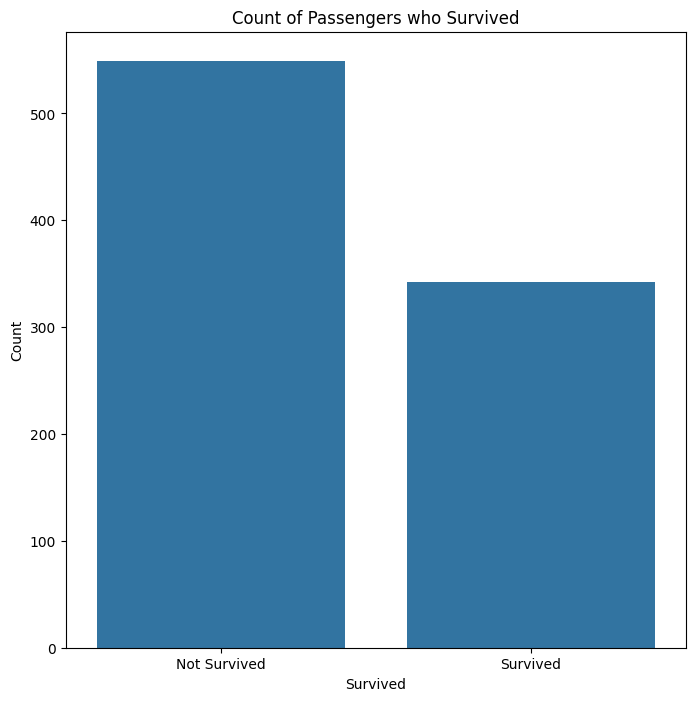

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Survived',data=df)
plt.xticks([0,1],['Not Survived','Survived'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Count of Passengers who Survived')
plt.show()

In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


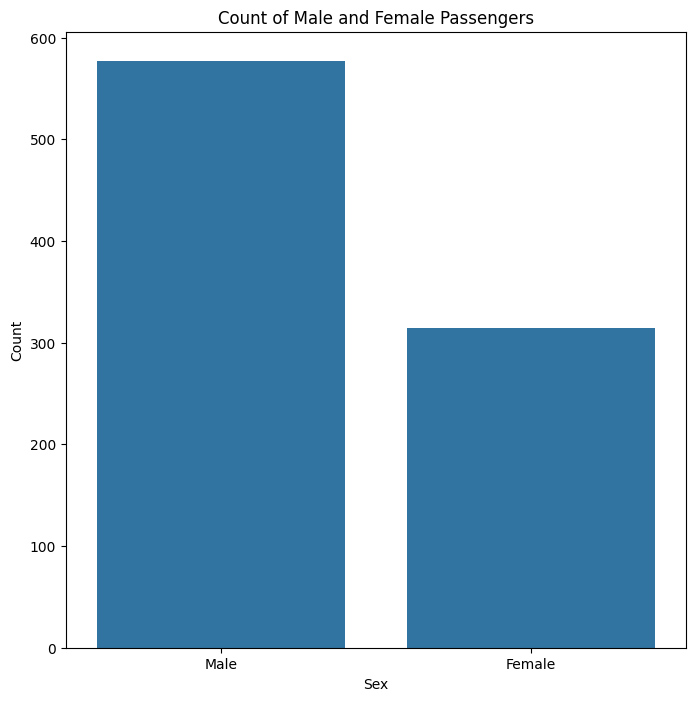

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Sex',data=df)
plt.xticks([0,1],['Male','Female'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Male and Female Passengers')
plt.show()

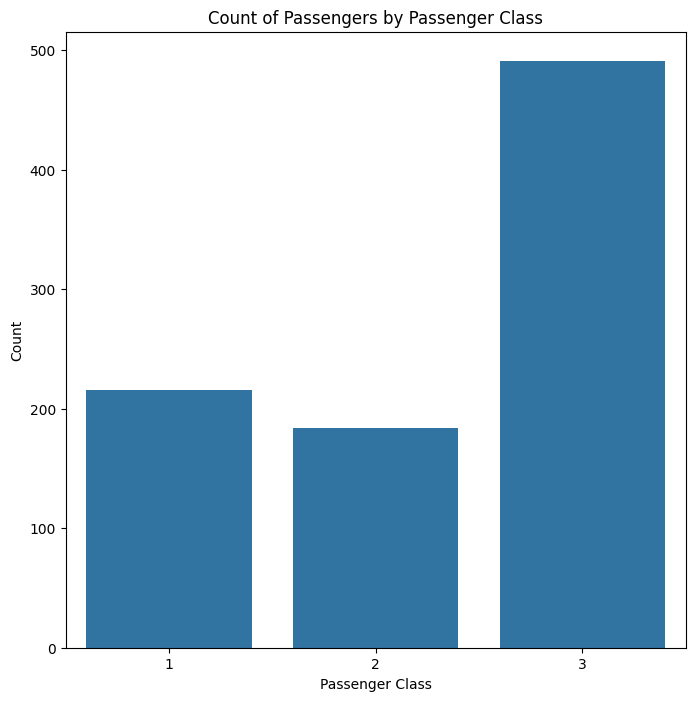

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Pclass',data=df)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Count of Passengers by Passenger Class')
plt.show()

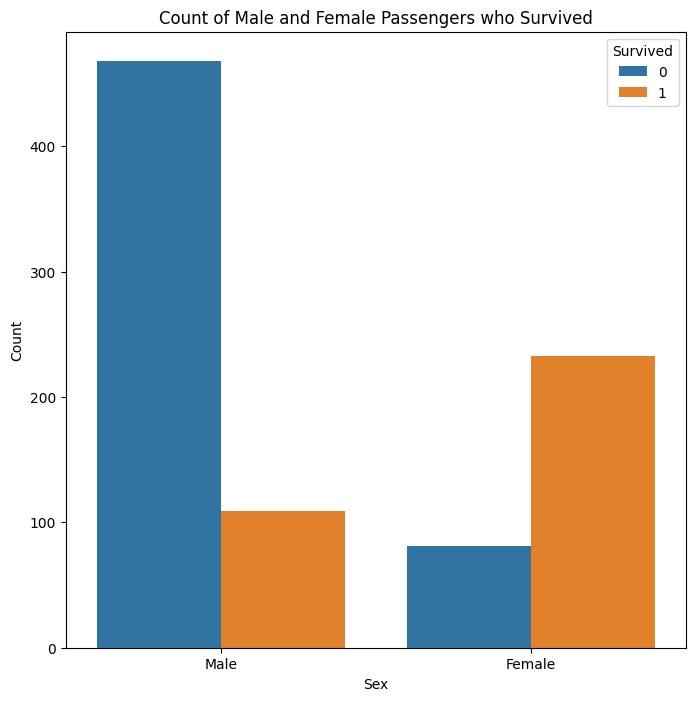

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.xticks([0,1],['Male','Female'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Male and Female Passengers who Survived')
plt.show()

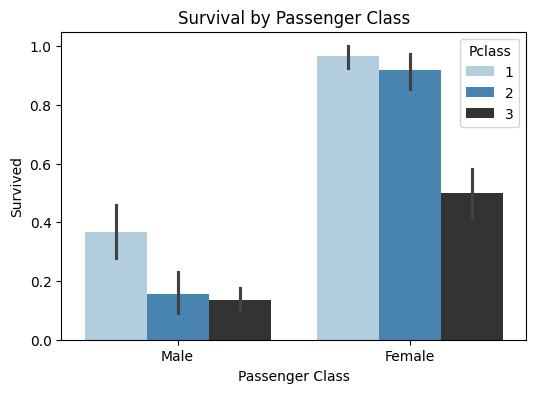

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex',y='Survived' ,hue='Pclass', data=df,palette="Blues_d")
plt.xticks([0,1],['Male','Female'])
plt.xlabel('Passenger Class')
plt.title('Survival by Passenger Class')
plt.show()

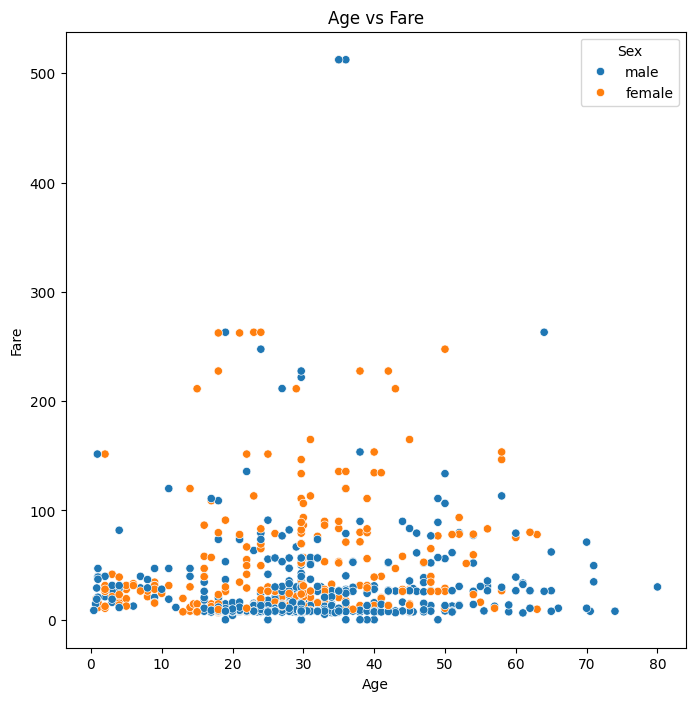

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age", y="Fare", hue="Sex", data=df)
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

In [ ]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,2,0
3,1,1,0,35.0,1,0,53.1000,2,1
4,0,3,1,35.0,0,0,8.0500,2,0


In [ ]:
X = df.drop(columns=['Survived'],axis=1)
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(712, 8)

In [ ]:
X_test.shape

(179, 8)

In [ ]:
y_train.shape

(712,)

In [ ]:
y_test.shape

(179,)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Model Building
## Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{round(accuracy) }")

Accuracy:1


In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[90, 15],
       [19, 55]])

Text(0.5, 1.0, 'Confusion Matrix')

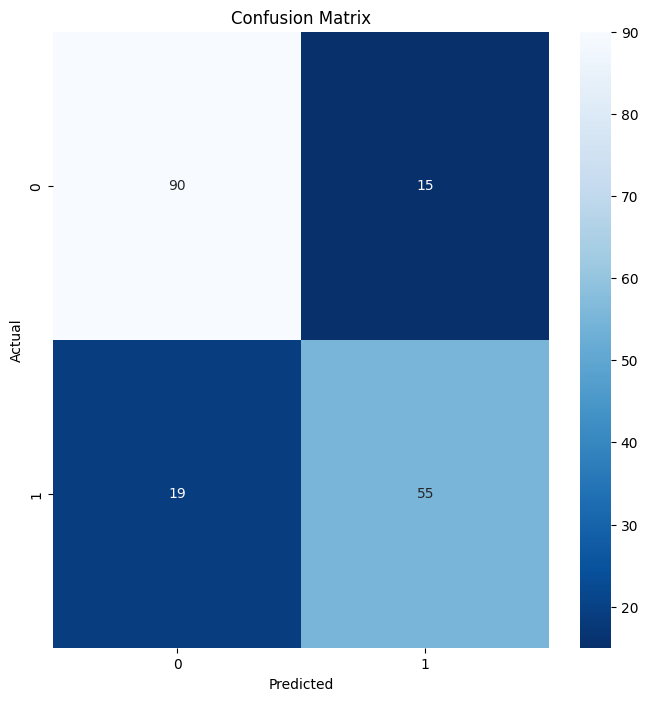

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cf_matrix,annot=True,fmt='d',cmap='Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# DecisonTree Classifier


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2, min_samples_split=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{round(accuracy*100,2)}")

Accuracy:82.68


In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[96,  9],
       [22, 52]])

Text(0.5, 1.0, 'Confusion Matrix')

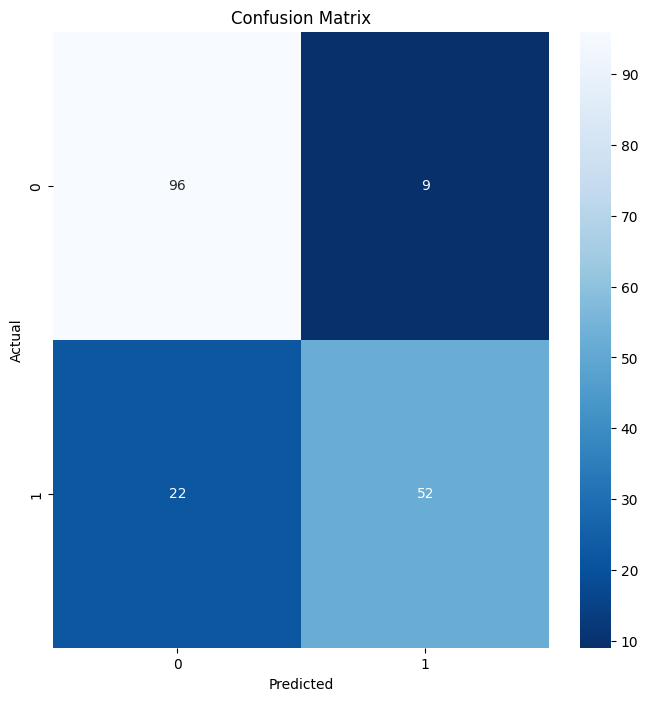

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cf_matrix,annot=True,fmt='d',cmap='Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.70      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



# RandomForest

In [ ]:
rf = RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=10, n_estimators=50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{round(accuracy*100,2)}")

Accuracy:82.12


In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[92, 13],
       [19, 55]])

Text(0.5, 1.0, 'Confusion Matrix')

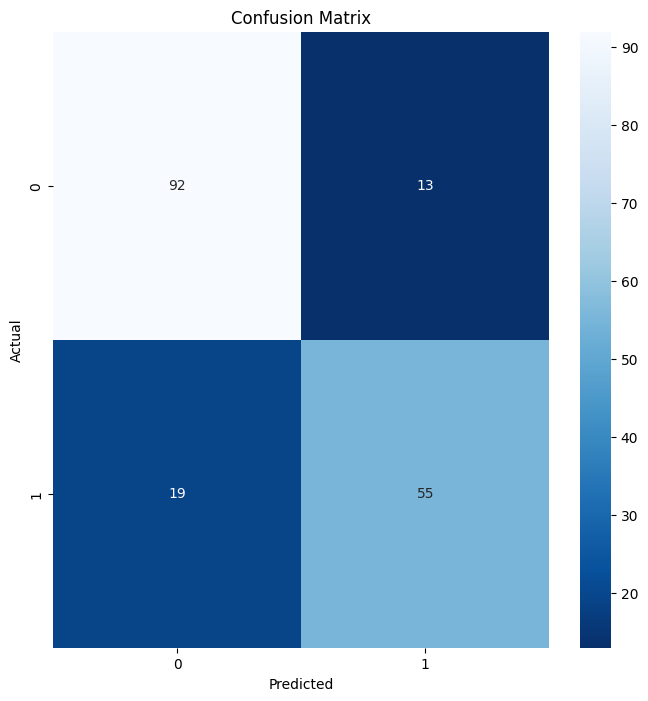

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cf_matrix,annot=True,fmt='d',cmap='Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Deploy the model

In [ ]:
import joblib

# Save the best model (Random Forest)
joblib.dump(dt, 'titanic_survival_model.pkl')

['titanic_survival_model.pkl']